In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization

In [16]:
data = pd.read_csv('dataset/NutriLens5.csv')
data

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,14,4,10,C
1,0.00,2.70,0.90,9.80,0.0,0.1000,2,1,1,B
2,57.00,10.00,0.10,3.90,0.0,0.0900,0,5,-5,A
3,375.00,7.80,3.08,70.10,0.0,1.4000,17,4,13,D
4,163.90,15.30,1.00,0.00,0.0,1.1000,3,5,-2,A
...,...,...,...,...,...,...,...,...,...,...
104994,299.21,8.66,7.09,19.69,0.8,0.0000,14,6,8,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,11,6,5,C
104996,238.00,9.90,0.50,25.74,0.0,1.6075,7,5,2,B
104997,40.00,0.81,0.00,10.48,1.6,1.6075,2,2,0,B


In [17]:
data.sort_values(by='Lemak (g)', ascending=False).groupby('Lemak (g)').head(20)

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
8567,0.000000,42.857143,1448.5714,0.000000,0.0,1.250000,10,5,5,C
936,58000.000000,4000.000000,1200.0000,2800.000000,400.0,0.000000,30,10,20,E
10909,22000.000000,200.000000,1000.0000,2200.000000,300.0,0.000000,30,10,20,E
57319,37000.000000,3200.000000,1000.0000,0.000000,0.0,2.833333,20,5,15,D
77499,38000.000000,1800.000000,600.0000,5800.000000,400.0,0.040000,30,10,20,E
...,...,...,...,...,...,...,...,...,...,...
104016,73.000000,0.000000,0.0000,18.180000,0.0,0.000000,4,0,4,C
87421,20.000000,0.000000,0.0000,6.000000,0.0,0.000000,1,0,1,B
87395,166.666667,6.666667,0.0000,33.333333,0.0,0.000000,9,4,5,C
18003,233.000000,0.000000,0.0000,46.670000,0.0,2.417500,12,0,12,D


In [18]:
data[data['Grade'] == "C"]

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,14,4,10,C
8,0.00,5.10,2.20,29.00,0.0,4.6000,8,3,5,C
12,63.00,0.20,0.00,15.50,0.0,0.0000,3,0,3,C
14,129.00,4.40,3.10,16.30,0.0,0.0000,7,2,5,C
17,222.00,11.70,2.10,38.40,0.0,0.0000,12,5,7,C
...,...,...,...,...,...,...,...,...,...,...
104988,305.00,8.59,7.81,23.44,3.1,0.0000,15,9,6,C
104991,193.00,10.08,2.52,23.53,0.8,1.2675,9,6,3,C
104994,299.21,8.66,7.09,19.69,0.8,0.0000,14,6,8,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,11,6,5,C


In [19]:
data.columns = data.columns.str.lower().str.replace(" ","_")

In [20]:
data.columns

Index(['energi_(kal)', 'protein_(g)', 'lemak_(g)', 'gula_(g)', 'serat_(g)',
       'natrium_(mg)', 'negative_score', 'positif', 'score', 'grade'],
      dtype='object')

In [21]:
X = data[['energi_(kal)', 'protein_(g)', 'lemak_(g)','gula_(g)', 'serat_(g)', 'natrium_(mg)']].values
y = data['grade'].values

In [22]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
y_integers = np.array([grade_mapping[grade] for grade in y])
y = tf.one_hot(y_integers, depth=len(grade_mapping))
# Convert the one-hot encoded tensor to a NumPy array
y_one_hot_array = y.numpy()

# Now you can use train_test_split with the NumPy array
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_array, test_size=0.2, random_state=42)


In [57]:
# for normalize x feature
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)
# Define a custom callback to stop training when val_accuracy > 91%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.95:
            print("\\val_accuracy has reached above 90,% so stopping training.")
            self.model.stop_training = True
            
# Create the model
model = Sequential([
    normalizer, # normalize input
    Dense(256,activation='relu'),
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  
])

# Compile the model with cross-entropy loss function and an optimizer of your choice
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mae'])

# Instantiate the custom callback
callback = CustomCallback()

# Train the model with the callback
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100,
                    callbacks=[callback])

Epoch 1/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step - accuracy: 0.7633 - loss: 0.6155 - mae: 0.1412 - val_accuracy: 0.9050 - val_loss: 0.2675 - val_mae: 0.0586
Epoch 2/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step - accuracy: 0.9115 - loss: 0.2231 - mae: 0.0544 - val_accuracy: 0.9015 - val_loss: 0.2681 - val_mae: 0.0582
Epoch 3/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 753us/step - accuracy: 0.9179 - loss: 0.2373 - mae: 0.0496 - val_accuracy: 0.9154 - val_loss: 0.2084 - val_mae: 0.0471
Epoch 4/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - accuracy: 0.9213 - loss: 0.2140 - mae: 0.0455 - val_accuracy: 0.9307 - val_loss: 0.1687 - val_mae: 0.0403
Epoch 5/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9316 - loss: 0.1701 - mae: 0.0402 - val_accuracy: 0.9204 - val_loss: 0.2040 - val_mae: 0.0400
Epoch 6/100
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9342 - loss: 0.1765 - mae: 0.0376 - val_accuracy: 0.9388 - val_loss: 0.1506 - val_mae: 0.0355
Epoch 7/10

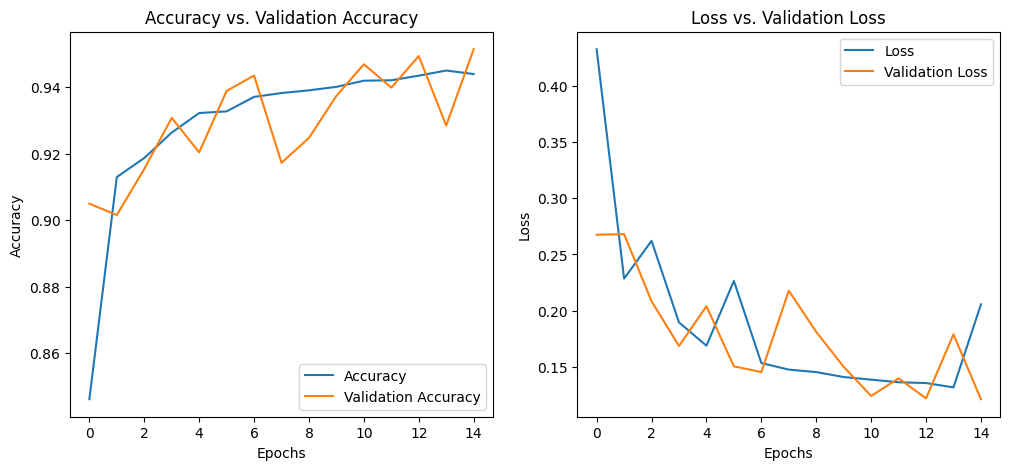

In [58]:
# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Predict

In [59]:
# This function doesn't use normalized for the input feature

#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

def output(energi, protein, lemak, karbohidrat, serat, natrium):
    index_to_grade = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
    input_data = np.array([[energi, protein, lemak, karbohidrat, serat, natrium]])
    predict = model.predict(input_data)
    max_index = np.argmax(predict)
    grade = index_to_grade[max_index]
    predict = np.array2string(predict, formatter={'float_kind':'{0:.3f}'.format})
    
    return grade, predict

In [97]:
# This function uses normalize for the input feature

#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

def output(energi, protein, lemak, karbohidrat, serat, natrium):
    input_data = np.array([[energi, protein, lemak, karbohidrat, serat, natrium]])
    input_data_normalized = normalizer(input_data)
    predict = model.predict(input_data_normalized)
    max_index = np.argmax(predict)
    index_to_grade = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
    predict = np.array2string(predict, formatter={'float_kind':'{0:.3f}'.format})
    return index_to_grade[max_index], predict

For old dataset contain 1000 record, if we using function that doesn't  use normalize the output is match the manual calculation, but if we are using normalize feature in predict it doesn't match the manual calculation.

In [98]:
#input
#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
result = output(0.09, 2, 4, 12, 0, 220) # C
result = output(554, 8.3, 19.7, 39.5, 4.2, 400) # E / D
result = output(376,5,4,50,2.1,270) # D
result = output(643,4.8,38.6,31.0,0,0) # E
result = output(500,5,12.5,0,0,300) # E / D
result = output(550,10,15,0,0,575)
result = output(533,6,23,26,0,150)
result = output(555,11,33,22,3.1,222)
result = output(484,6,8.1,33.4,0,490)
result = output(600,12,18,28,0,0)
result = output(527,5,16,55,2.7,69)
result = output(500,8,8,16,8.3,708)
result = output(500,9.09,12.5,45,4.54,227)
result = output(550,20,15,0,0,625)
result = output(536,11.3,33.6,45.2,0,88)
result = output(487,7.6,12.8,30.7,5.12,294.8)
result = output(500,6.25,21.875,31.25,6.25,187.5)
result = output(492,4.3,10.1,38.4,2.5,534)
result = output(714.2,0,57.1,0,0,571.4)
result = output(480,48,10,0,0,770)
result = output(500,8.3,8.3,33.3,0,208.3)
result = output(550,10,20,45,5,75)
result = output(500,0,12.5,5,10,850)
result = output(333,6.6,5,56.6,0,83.3)
result = output(500,0,12.5,5,10,450)
result = output(520,4,14,4,0,300)
result = output(337,8.5,1.1,22.4,8.6,220)
result = output(375,54.16,10.41,16.66,4.16,0)
print(result)
#output
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [40]:
model.save("model.h5")

In [4]:
data_2 = pd.read_csv('mycsv.csv')

In [12]:
#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
data_2

,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,Unnamed: 7
0,165.0,1.5,65.0,12.6,3.0,NaN,NaN,NaN
1,NaN,2.7,9.8,9.8,NaN,NaN,NaN,NaN
2,57.0,10.0,3.9,3.9,NaN,NaN,-5.0,NaN
3,375.0,7.8,70.1,15.0,NaN,NaN,NaN,NaN
4,163.9,15.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1048570,177.0,0.4,42.0,40.0,2.8,50.0,7.0,NaN
1048571,173.0,0.0,42.0,40.0,NaN,NaN,10.0,NaN
1048572,179.0,0.6,42.0,40.0,3.4,NaN,6.0,NaN
1048573,250.0,1.1,59.0,48.0,3.2,NaN,10.0,NaN


In [8]:
data_2.isnull().sum()

energy-kcal_100g                 24921
proteins_100g                    18676
carbohydrates_100g               20580
sugars_100g                      40659
fiber_100g                      453598
fruits-vegetables-nuts_100g    1044562
nutrition-score-fr_100g         550194
Unnamed: 7                     1048573
dtype: int64

In [11]:
data_2[data_2["fruits-vegetables-nuts_100g"].notnull()]

,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fiber_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,Unnamed: 7
824,NaN,4.9,60.0,34.0,1.5,37.4,13.0,NaN
3048,NaN,6.0,54.2,29.4,1.9,12.0,19.0,NaN
3501,NaN,0.8,5.3,2.4,0.8,38.0,3.0,NaN
4427,7.0,0.2,1.1,1.1,0.1,29.0,2.0,NaN
25885,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1047124,NaN,0.9,4.9,3.2,1.8,87.0,-2.0,NaN
1047679,210.0,21.0,0.0,0.0,0.0,14.0,3.0,NaN
1047803,325.0,16.0,0.0,0.0,0.0,0.0,12.0,NaN
1047862,255.0,26.0,0.0,0.0,NaN,0.0,4.0,NaN
